Q1: Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
# Install the latest versions of TensorFlow and Keras
!pip install tensorflow
!pip install keras

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Print their versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


Q2: Load the Wine Quality dataset and explore its dimensions.

In [2]:
import pandas as pd

# Download the dataset
wine_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(wine_data_url, sep=";")

# Explore the dimensions of the dataset
print("Shape of the dataset:", wine_data.shape)

Shape of the dataset: (4898, 12)


Q3: Check for null values, identify categorical variables, and encode them.

In [3]:
# Check for null values
null_values = wine_data.isnull().sum()
print("Null values:\n", null_values)

# Identify categorical variables (assuming all non-numeric variables are categorical)
categorical_columns = wine_data.select_dtypes(include=['object']).columns
print("Categorical variables:\n", categorical_columns)

# Encode categorical variables (if needed)
# If there are categorical variables, we can encode them using one-hot encoding or label encoding.
# using one-hot encoding:
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_columns)

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables:
 Index([], dtype='object')


Q4: Separate the features and target variables from the dataframe.

In [4]:
# the target variable is 'quality'
X = wine_data_encoded.drop(columns=['quality'])  # Features
y = wine_data_encoded['quality']  # Target variable

Q5: Perform a train-test split and divide the data into training, validation, and test datasets.

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (3428, 11) (3428,)
Validation data shape: (735, 11) (735,)
Test data shape: (735, 11) (735,)


Q6: Perform scaling on the dataset.

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Q7: Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [7]:
from tensorflow import keras

# Create a Sequential model
model = keras.Sequential()

# Add the input layer (input_shape should match the number of features)
model.add(keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Add hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add the output layer for binary classification (1 neuron, sigmoid activation)
model.add(keras.layers.Dense(1, activation='sigmoid'))

Q8: Create a Sequential model and add all the layers to it.

In [ ]:
# We've already added the layers to the Sequential model in the previous code snippet.
# We can add other layers or modify the architecture as needed.

Q9: Implement a TensorBoard callback to visualize and monitor the model's training process.

In [8]:
# Import TensorBoard
from tensorflow.keras.callbacks import TensorBoard

# Specify the log directory for TensorBoard
log_dir = "logs/fit/"

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the TensorBoard callback
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=[tensorboard_callback])

Epoch 1/20
108/108 [==============================] - 1s 4ms/step - loss: -35.0018 - accuracy: 0.0000e+00 - val_loss: -114.1535 - val_accuracy: 0.0000e+00
Epoch 2/20
108/108 [==============================] - 0s 2ms/step - loss: -386.5226 - accuracy: 0.0000e+00 - val_loss: -822.9266 - val_accuracy: 0.0000e+00
Epoch 3/20
108/108 [==============================] - 0s 2ms/step - loss: -1730.1322 - accuracy: 0.0000e+00 - val_loss: -2903.5159 - val_accuracy: 0.0000e+00
Epoch 4/20
108/108 [==============================] - 0s 2ms/step - loss: -4862.2373 - accuracy: 0.0000e+00 - val_loss: -7122.5552 - val_accuracy: 0.0000e+00
Epoch 5/20
108/108 [==============================] - 0s 2ms/step - loss: -10540.4053 - accuracy: 0.0000e+00 - val_loss: -14258.8057 - val_accuracy: 0.0000e+00
Epoch 6/20
108/108 [==============================] - 0s 2ms/step - loss: -19586.4824 - accuracy: 0.0000e+00 - val_loss: -25028.2422 - val_accuracy: 0.0000e+00
Epoch 7/20
108/108 [==============================] -

Q10: Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [9]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: -879434.8750 - accuracy: 0.0000e+00 - val_loss: -922086.1250 - val_accuracy: 0.0000e+00
Epoch 2/20
108/108 [==============================] - 0s 2ms/step - loss: -998022.3750 - accuracy: 0.0000e+00 - val_loss: -1043089.7500 - val_accuracy: 0.0000e+00
Epoch 3/20
108/108 [==============================] - 0s 2ms/step - loss: -1125764.8750 - accuracy: 0.0000e+00 - val_loss: -1172677.8750 - val_accuracy: 0.0000e+00
Epoch 4/20
108/108 [==============================] - 0s 3ms/step - loss: -1262979.8750 - accuracy: 0.0000e+00 - val_loss: -1312843.8750 - val_accuracy: 0.0000e+00
Epoch 5/20
108/108 [==============================] - 0s 3ms/step - loss: -1408669.3750 - accuracy: 0.0000e+00 - val_loss: -1460324.3750 - val_accuracy: 0.0000e+00
Epoch 6/20
108/108 [==============================] - 0s 3ms/step - loss: -1563350.3750 - accuracy: 0.0000e+00 - val_loss: -1616808.6250 - val_accuracy: 0.0000e+00
Epoch 7/20
108/108 

Q11: Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [10]:
# Import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Specify the checkpoint path
checkpoint_path = "best_model.h5"

# Create a ModelCheckpoint callback to save the best model
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Choose the metric to monitor (e.g., validation accuracy)
    save_best_only=True,     # Save only the best model
    mode='max',              # Maximize the monitored metric
    verbose=1                # Display a message when saving the best model
)

Q12: Print the model summary.

In [11]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Q13: Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [12]:
# Compile the model with the specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Q14: Compile the model with the specified loss function, optimizer, and metrics.

In [ ]:
# We've already compiled the model in the previous code.

Q15: Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [13]:
# Import the necessary callbacks
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Specify the callback paths
log_dir = "logs/fit/"
checkpoint_path = "best_model.h5"

# Create callbacks
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Fit the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/20
 78/108 [====================>.........] - ETA: 0s - loss: -5000502.0000 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5
108/108 [==============================] - 1s 3ms/step - loss: -5006165.0000 - accuracy: 0.0000e+00 - val_loss: -5035983.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
 78/108 [====================>.........] - ETA: 0s - loss: -5202890.0000 - accuracy: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00000
108/108 [==============================] - 0s 2ms/step - loss: -5239444.0000 - accuracy: 0.0000e+00 - val_loss: -5270804.5000 - val_accuracy: 0.0000e+00
Epoch 3/20
104/108 [===========================>..] - ETA: 0s - loss: -5474432.0000 - accuracy: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000
108/108 [==============================] - 0s 3ms/step - loss: -5482149.0000 - accuracy: 0.0000e+00 - val_loss: -5514557.5000 - val_accuracy: 0.0000e+00
Epoch 4/20
 75/108 [===============

Q16: Get the model's parameters.

In [14]:
# Get the model's parameters
model_params = model.get_weights()

Q17: Store the model's training history as a Pandas DataFrame.

In [15]:
import pandas as pd

# Create a DataFrame from the model's training history
history_df = pd.DataFrame(history.history)

# Print the first few rows of the history DataFrame
print(history_df.head())

        loss  accuracy   val_loss  val_accuracy
0 -5006165.0       0.0 -5035983.0           0.0
1 -5239444.0       0.0 -5270804.5           0.0
2 -5482149.0       0.0 -5514557.5           0.0
3 -5736269.5       0.0 -5771050.0           0.0
4 -6002550.5       0.0 -6037623.0           0.0


Q18: Plot the model's training history.

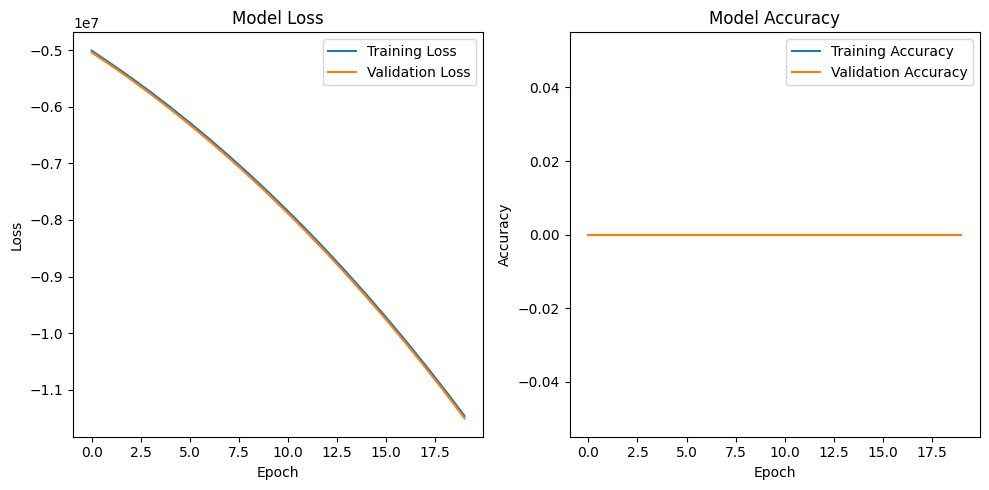

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Q19: Evaluate the model's performance using the test data.

In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

23/23 [==============================] - 0s 1ms/step - loss: -12081920.0000 - accuracy: 0.0000e+00
Test Loss: -12081920.0000
Test Accuracy: 0.00%
